In [4]:
#libraries
import pandas as pd
import re

In [7]:
#importing dataframe
data= pd.read_excel('/content/startup_funding_data.xlsx')

In [8]:
data

,Month,Year,Company,Sector,Headquarters,Amount,Funding Round Type,Lead Investors
0,January,2025,Infra.Market,Construction Materials,Mumbai,$121 million,Funding Round,Tiger Global
1,january,2025,Nazara Technologies,Gaming & Media,Mumbai,$60 million,Funding Round,"Axana Estates LLP, Arpit Khandelwal, Mithun Sa..."
2,January,2025,Ati Motors,Industrial Robotics,Bengaluru,$20 million,Series B,"Walden Catalyst Ventures, NGP Capital, True Ve..."
3,January,2025,Aris Infra Solutions,Tech-enabled Procurement,Mumbai,$ 80 million,Pre-IPO Round,Mukul Agrawal (Param Capital)
4,January,2025,Deconstruct,D2C Skincare,Bengaluru,$7.7 million,Funding Round,"BOLD (L’Oréal’s VC Fund), V3 Ventures, DSG Con..."
...,...,...,...,...,...,...,...,...
503,August,2024,CURRYiT,Food and Beverages,New Delhi,Rs 4.5 crore,Seed Round,"RK Family Trust, Tangent Advisors, Freeflow Ve..."
504,August,2024,IppoPay,Fintech,Chennai,Undisclosed,Funding Round,"Mithun Sacheti, Siddhartha Sacheti"
505,August,2024,Nazara Technologies,"Gaming, Media",Mumbai,$27 Mn,Acquisition,Acquired Fusebox Games Limited
506,August,2024,Infibeam Avenues,Fintech,"GiFT, Gandhinagar",54% Stake,Acquisition,Acquired 54% in Rediff.com India Ltd


In [10]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Function to clean and convert funding values
def convert_to_crore(value):
    value = str(value).lower()

    # Remove bracketed values
    value = re.sub(r'\(.*?\)', '', value).strip()

    # Convert crore values directly
    if "crore" in value:
        match = re.search(r'([\d\.]+)\s*crore', value)
        if match:
            return float(match.group(1))  # Already in crores

    # Convert million to crore (1 million = 0.1 crore)
    elif "million" in value:
        match = re.search(r'([\d\.]+)\s*million', value)
        if match:
            return float(match.group(1)) * 0.1

    return None  # Handle "Undisclosed" and invalid cases

# Apply conversion function
df["Amount_in_Crore"] = df["Amount"].apply(convert_to_crore)

# Remove rows where funding is "Undisclosed"
df = df.dropna(subset=["Amount_in_Crore"]).drop(columns=["Amount"])  # Drop original column

# Display cleaned data
df.head()



,Month,Year,Company,Sector,Headquarters,Funding Round Type,Lead Investors,Amount_in_Crore
0,January,2025,Infra.Market,Construction Materials,Mumbai,Funding Round,Tiger Global,12.10
1,january,2025,Nazara Technologies,Gaming & Media,Mumbai,Funding Round,"Axana Estates LLP, Arpit Khandelwal, Mithun Sa...",6.00
2,January,2025,Ati Motors,Industrial Robotics,Bengaluru,Series B,"Walden Catalyst Ventures, NGP Capital, True Ve...",2.00
3,January,2025,Aris Infra Solutions,Tech-enabled Procurement,Mumbai,Pre-IPO Round,Mukul Agrawal (Param Capital),8.00
4,January,2025,Deconstruct,D2C Skincare,Bengaluru,Funding Round,"BOLD (L’Oréal’s VC Fund), V3 Ventures, DSG Con...",0.77


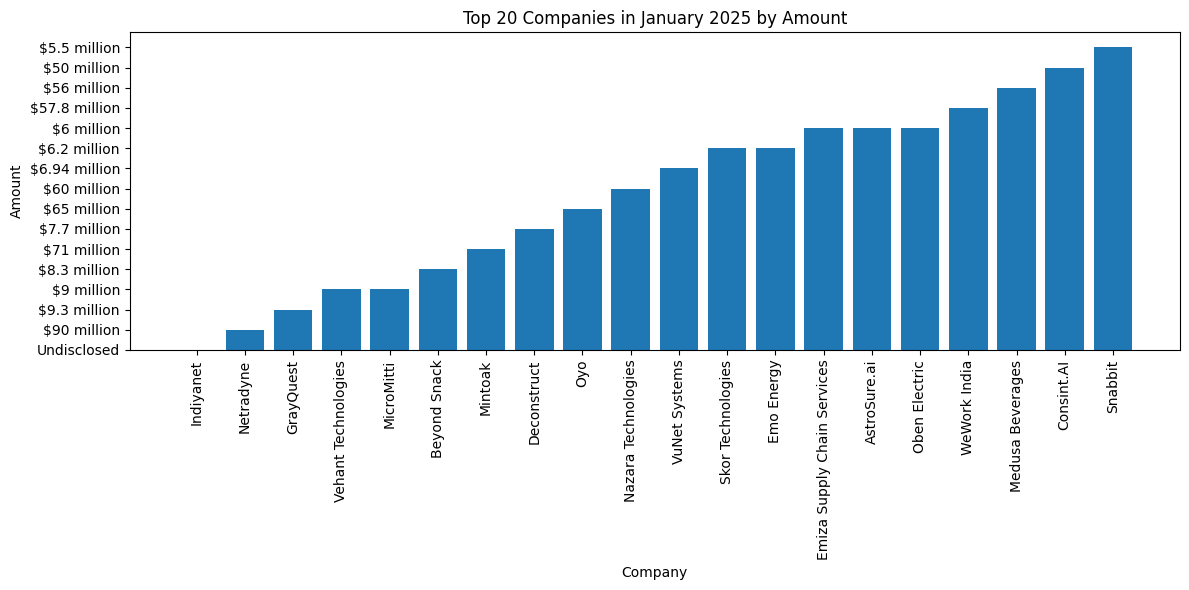

In [50]:
#  companies for jan 2025,20 companies with highest investment

# Filter data for January 2025
jan_2025_data = data[(data['Month'] == 'january') & (data['Year '] == 2025)]

# Sort by amount and get top 20
top_20_companies = jan_2025_data.sort_values('Amount', ascending=False).head(20)

# Create a bar plot of the top 20 companies
plt.figure(figsize=(12, 6))
plt.bar(top_20_companies['Company'], top_20_companies['Amount'])
plt.xlabel('Company')
plt.ylabel('Amount')
plt.title('Top 20 Companies in January 2025 by Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

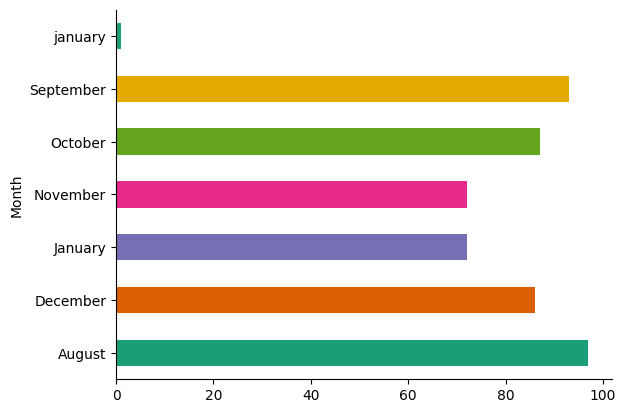

In [40]:


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Top 20 Companies by Funding Amount:
Nazara Technologies: 855.0 Crore
Ather Energy: 600.0 Crore
Zaggle Prepaid Ocean Services: 595.0 Crore
Purplle: 500.0 Crore
Zomato: 500.0 Crore
Oyo: 457.0 Crore
M2P Fintech: 417.5 Crore
Neo: 400.0 Crore
Arnya Real Estate: 375.0 Crore
Wooden Street: 354.0 Crore
FlexiLoans: 290.0 Crore
GIVA: 255.0 Crore
Everest Fleet: 251.7 Crore
Big Bang Boom: 250.0 Crore
Aye Finance: 250.0 Crore
Baazar Style: 250.0 Crore
Visit Health: 250.0 Crore
Pakka Limited: 244.7 Crore
Haldiram Bhujiawala: 235.0 Crore
Sunsure Energy: 226.0 Crore


<ipython-input-16-ff1fc5af95be>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Amount_in_Crore', data=top_20_companies, palette="crest_r")


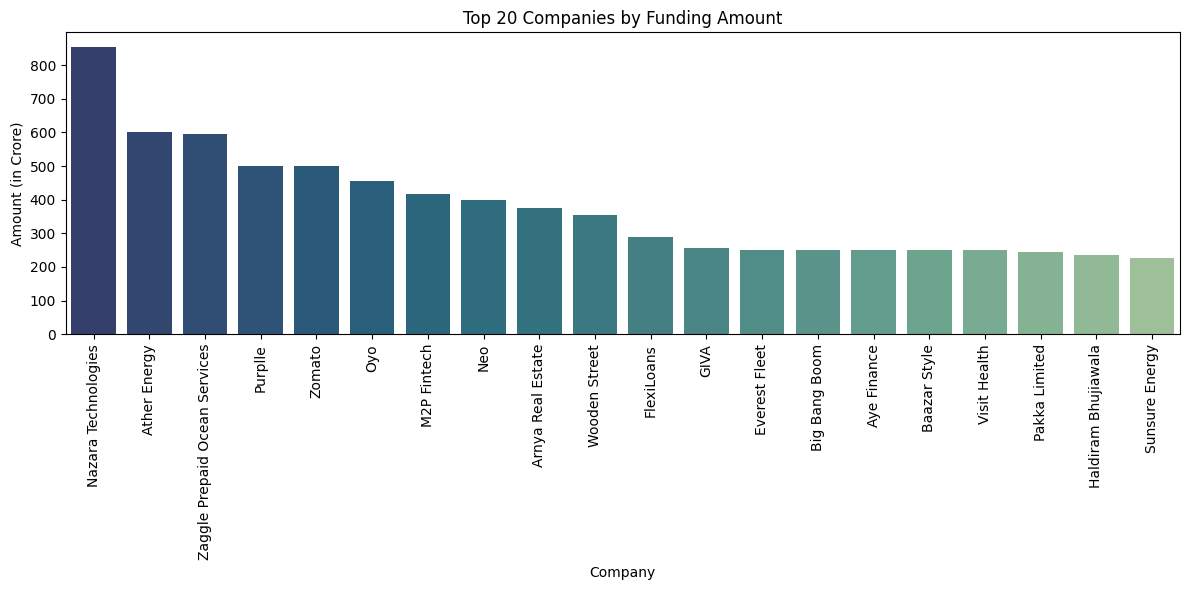

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame in descending order
df_sorted = df.sort_values('Amount_in_Crore', ascending=False)

# Select the top 20 companies
top_20_companies = df_sorted.head(20)

# Print the company names and their funding amounts
print("Top 20 Companies by Funding Amount:")
for index, row in top_20_companies.iterrows():
    print(f"{row['Company']}: {row['Amount_in_Crore']} Crore")


# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(x='Company', y='Amount_in_Crore', data=top_20_companies, palette="crest_r")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Company")
plt.ylabel("Amount (in Crore)")
plt.title("Top 20 Companies by Funding Amount")

# Show the plot
plt.tight_layout()
plt.show()

Top 5 Sectors:
 Sector
Fintech       16
Edtech        10
SaaS           9
Healthtech     8
Healthcare     8
Name: count, dtype: int64


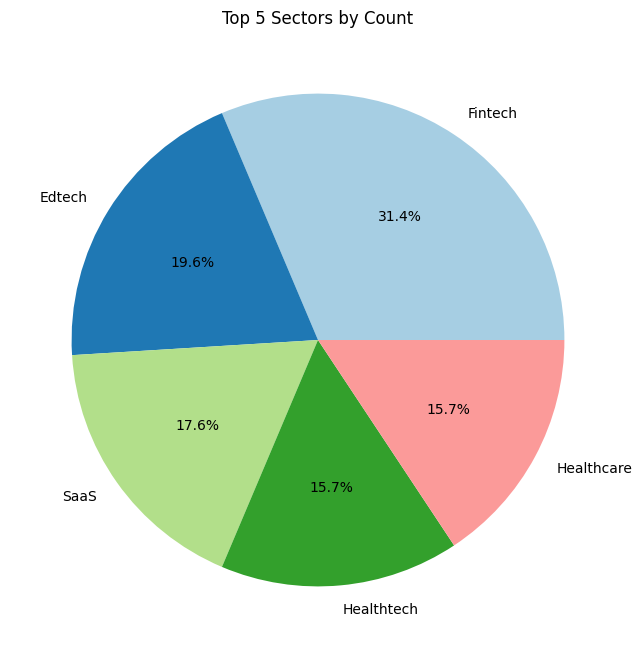

In [27]:
# Count occurrences of each sector
sector_counts = df["Sector"].value_counts()

# Select top 5 sectors
top_5_sectors = sector_counts.nlargest(5)

# Print sector counts
print("Top 5 Sectors:\n", top_5_sectors)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_sectors, labels=top_5_sectors.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Top 5 Sectors by Count")
plt.show()